<div style="border:solid Chocolate 2px; padding: 40px">

<b>Эдгар, привет!👋</b>

Меня зовут Арина Уксусова, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на ты, но если это не удобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b> В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

В нашем распоряжении данные компании интернет-магазина с информацией по гипотезам и заказам. Наша задача - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. Необходимо изучить: фреймворк ICE, RICE для приоритизации гипотез, графики по A/B-тесту. 

### Загрузим данные и подготовим их к анализу

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from pymystem3 import Mystem
from collections import Counter
from scipy import stats as st
import datetime as dt

In [2]:
hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'), #гипотезы
    pd.read_csv('/datasets/orders.csv'), #заказы
    pd.read_csv('/datasets/visitors.csv'), #визиты
)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Для подгрузки данных можно использовать конструкцию `try-except`, она поможет избежать потенциальных ошибок при загрузке данных, связанных, например, с некорректным указанием путей.
        
Подробнее о конструкции по ссылке:
        
https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html
        
Несколько интересных статей кейсы использования конструкции:
    
https://www.programiz.com/python-programming/exception-handling
    
https://towardsdatascience.com/do-not-abuse-try-except-in-python-d9b8ee59e23b
    
https://www.techbeamers.com/use-try-except-python/
        
Как вариант в try можно указать корректные пути (в нашем случае глобальные) в except - некорректные (локальные). Можно также специфицровать тип ошибки, FileNotFoundError или задать кастомный тип ошибки (FilePathError, например)
        
Она полезна, если ты работаешь локально, а потом подгружаешь проект на платформу. Конструкция позволит не падать коду и локально, и на сервере ЯП, так как если не сработает один блок с путями, сработает другой.
        
Либо же можно использовать стандартную библиотеку os:
        
https://pythonworld.ru/moduli/modul-os.html
        
Пример функции для подгрузки данных с использованием библиотеки os:
        
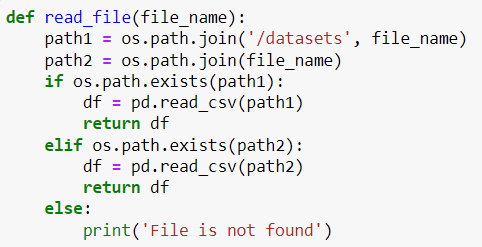

In [3]:
hypothesis.info() #изучим общую информацию о гипотезах
orders.info() #изучим общую информацию о заказах
visitors.info() #изучим общую информацию о визитах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   

In [4]:
display(hypothesis.isna().sum()) #проверим пропуски в данных с гипотезами
display(orders.isna().sum()) #проверим пропуски в данных с заказами
display(visitors.isna().sum())  #проверим пропуски в данных с визитами

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [5]:
display(hypothesis.duplicated().sum()) #проверим на дубликаты в данных с гипотезами
display(orders.duplicated().sum()) #проверим на дубликаты в данных с заказами
display(visitors.duplicated().sum())  #проверим на дубликаты в данных с визитами

0

0

0

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", 500) #настроим отображение, чтобы ничего не скрывалось

In [7]:
for i in [hypothesis, orders, visitors]:
    i.columns = [x.lower().replace(' ', '_') for x in i.columns.values] #приведем наши столбцы в данных к snake_case

In [8]:
orders['date'] = pd.to_datetime(orders['date']) #приведем столбец с датой в заказах к нужному типу
visitors['date'] = pd.to_datetime(visitors['date']) #приведем столбец с датой в визитах к нужному типу

In [9]:
hypothesis.info() #изучим общую информацию о гипотезах
orders.info() #изучим общую информацию о заказах
visitors.info() #изучим общую информацию о визитах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFr

Наши данные изучены и прошли предобработку. Пропуски и дубликаты отсутствуют, типы данных заменены на соответствующие в них значениям, столбцы приведены к стилю snake_case. Данные подготовлены к дальнейшему анализу.

### Проведем приоритизацию гипотез. Применим фреймворк ICE, RICE

In [10]:
hypothesis['hypothesis_number'] = range(1,10) #пронумеруем гипотезы 

Пронумеруем гипотезы для удобства анализа.

In [11]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'] #применим фреймворк ICE
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False).round(2) 

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наибольшее значение ICE имеет гипотеза №9 - "Запустить акцию, дающую скидку на товар в день рождения" (16.2). Наименьшее значение ICE у гипотезы №4 - "изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей". 

In [12]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'] #применим фреймворк RICE
hypothesis[['hypothesis','RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наибольшее значение RICE имеет гипотеза №8 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" (112). Наименьшее значение ICE у гипотезы №4 - "изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей".

Результаты ICE и RICE отличаются. В фреймворке RICE учитывается метрика Reach, которая умножается на другие метрики. Таким образом, гипотезы, которые имеют больший охват пользователей получают высокую оценку. Для оценки гипотезы больше подходит фреймворк RICE, так как нам нужна гипотеза, которая поможет увеличить выручку и достичь большоuj охвата пользователей. За основу возьмем гипотезу №7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Верное наблюдение про результаты по фреймворку RICE: добавление этого параметра влияет на порядок гипотез и их приоритет за счет параметра Reach. 

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
И еще несколько рекомендаций для улучшения шага (носят рекомендательный характер и являются развивающей обратной связью, при желании и возможности можно имплементировать часть (или все) рекомендации, а можно просто взять на вооружение🙌):
        

        
 * результаты можно было бы объединить в единой таблице. Также их можно было бы проранжировать и выделить цветом — https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html 
        
еще материал по теме оформления таблиц в pandas:
        
https://pbpython.com/styling-pandas.html
        
    
* в качестве визуализации изменения приоритетов можно использовать <a href="https://datayoga.ru/tpost/zh3s62fori-sloupgraf">slope graph</a>, <a href="https://chart-studio.plotly.com/~pcchang/224/slopegraph-spending-and-academic-performance-by-states-doc/#/">реализация на plotly</a>
        
И еще несколько ссылок для ознакомления с тем, как строить такие графики:
        
<a href="https://towardsdatascience.com/slope-charts-with-pythons-matplotlib-2c3456c137b8">раз</a>        
      
<a href="https://cduvallet.github.io/posts/2018/03/slopegraphs-in-python">два</a>     

      
<a href="https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib">три</a>     

 * в отчёте есть формулы для расчёта приоритезации, почему бы их не оформить, для этого есть микропакет для вёрстки `LaTex` - <a href="https://www.youtube.com/watch?v=vSc25kdgecg">Использование LaTex в Jupyter Notebook</a>
<br><a href="https://www.overleaf.com/static/latex/learn/free-online-introduction-to-latex-part-1.pdf">LaTex for beginners</a>. Вот так будут выглядеть формулы:👇
</ul></div> <br>

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

<hr style="border: 2px solid yellow;" /> 

### Проведем анализ A/B-теста

In [13]:
duplicates_users = np.intersect1d(orders.query('group == "A"')['visitorid'].unique(), orders.query('group == "B"')['visitorid'].unique())
len(duplicates_users) #проверим, есть ли пользователи, которые попали в обе группы

58

Во время сбора данных, скорее всего произошла ошибка, при которой мы имеем 58 пользователей попавших в две группы. Удаление этих пользователей повлияет на конверсию. Мы можем их удалить из таблицы с заказами, но не сможем из таблицы с визитами, поэтому оставим данные с дубликатами. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Абсолютно верное действие проверить данные на наличие пользователей, попавших в обе группы. Пересечение групп может повлиять на результаты анализа. В реальной практике тест скорее всего пришлось бы проводить заново. В рамках нашего проекта в качестве практики можно попробовать исключить таких пользователей из заказов, при этом нужно иметь в виду, что корректно исключить их из визитов не получится, так как данные в этом датасете агрегированы.
</div>

In [14]:
#делим visitors по группам и считаем кумулятивные данные по датам
# группа А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# группа В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


#делим orders по группам и считаем кумулятивные данные по датам
# группа А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
# группа В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#собираем данные в единый фрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.tail(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
26,2019-08-27,28,286780,16,147677,495,3514698,548,5232260,711,720,16376,16523
27,2019-08-28,17,101122,28,96008,512,3615820,576,5328268,594,654,16970,17177
28,2019-08-29,22,320690,20,231130,534,3936510,596,5559398,577,531,17547,17708
29,2019-08-30,11,86460,24,215233,545,4022970,620,5774631,490,490,18037,18198
30,2019-08-31,12,61833,20,133129,557,4084803,640,5907760,699,718,18736,18916


Создадим сводный датафрейм date. 

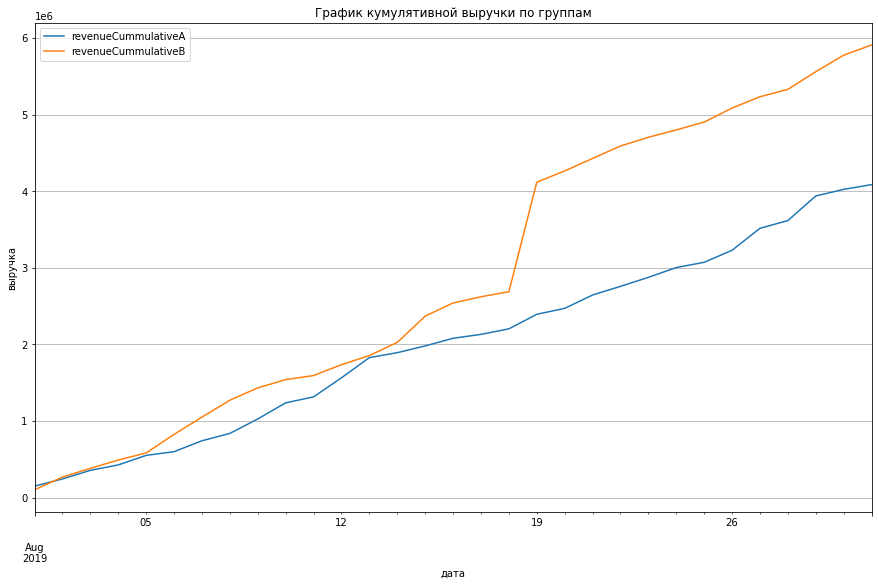

In [15]:
data[['date','revenueCummulativeA', 'revenueCummulativeB']] .plot(x = 'date',
                  grid=True,  title = "График кумулятивной выручки по группам", figsize=(15,9)).set(
                  xlabel = 'дата', ylabel = 'выручка', ) ;

Построим график кумулятивной выручки по группам. На нем наблюдается резкий скачек в графике у группы В 19 августа, возможно имеются аномально большое количество заказов или высокий средний чек. 

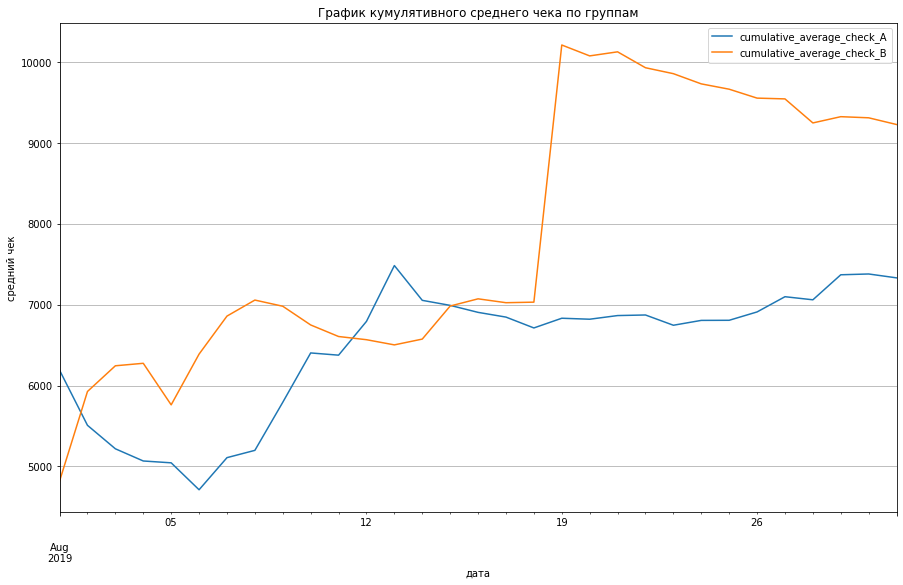

In [16]:
data['cumulative_average_check_A'] = data['revenueCummulativeA'] / data['ordersCummulativeA']
data['cumulative_average_check_B'] = data['revenueCummulativeB'] / data['ordersCummulativeB']

data[['date','cumulative_average_check_A', 'cumulative_average_check_B']] .plot(x = 'date',
                  grid=True,  title = "График кумулятивного среднего чека по группам", figsize=(15,9)).set(
                  xlabel = 'дата', ylabel = 'средний чек');

Построим график кумулятивного среднего чека по группам. На нем наблюдается нестабильность и резкие скачки данных. Скорее всего это связано, с аномальными значениями, которые искажают общую картину.

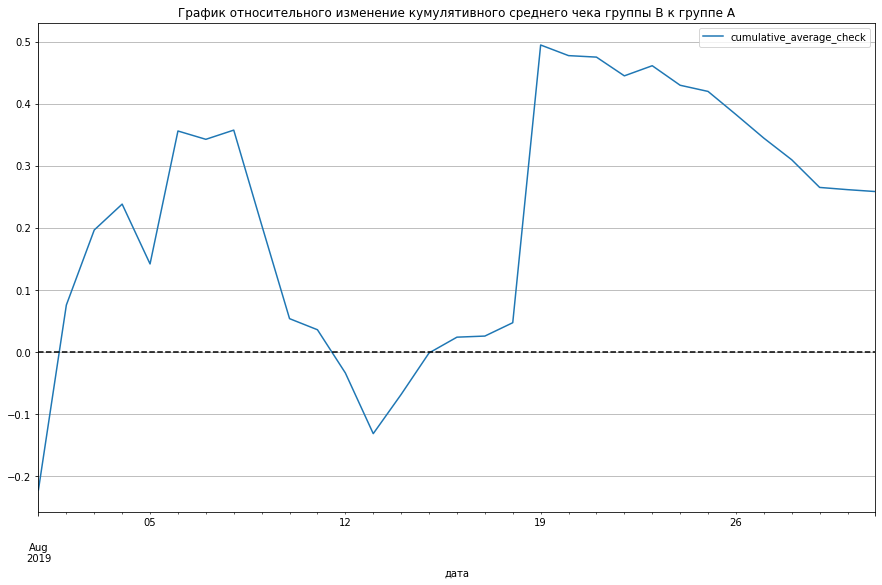

In [17]:
data['cumulative_average_check'] = data['cumulative_average_check_B'] / data['cumulative_average_check_A']-1


data[['date','cumulative_average_check']] .plot(x = 'date',
                  grid=True,  
                  title = "График относительного изменение кумулятивного среднего чека группы B к группе A",
                                               figsize=(15,9)).set(
                  xlabel = 'дата');
plt.axhline(y=0, color='black', linestyle='--');

Построим график различия среднего чека группы B к группе A. Нам нем наблюдается относительный рост суммы кумулятивного чека группы В примерно до 7 августа и далее резкий спад до 13 августа, далее снова резкий подъем, и снова падение. Стоит отметить, что кумулятивная выручка группы В выше, чем у группы А, но она крайне нестабильна. Скорее всего, дело снова в аномальных значениях. 

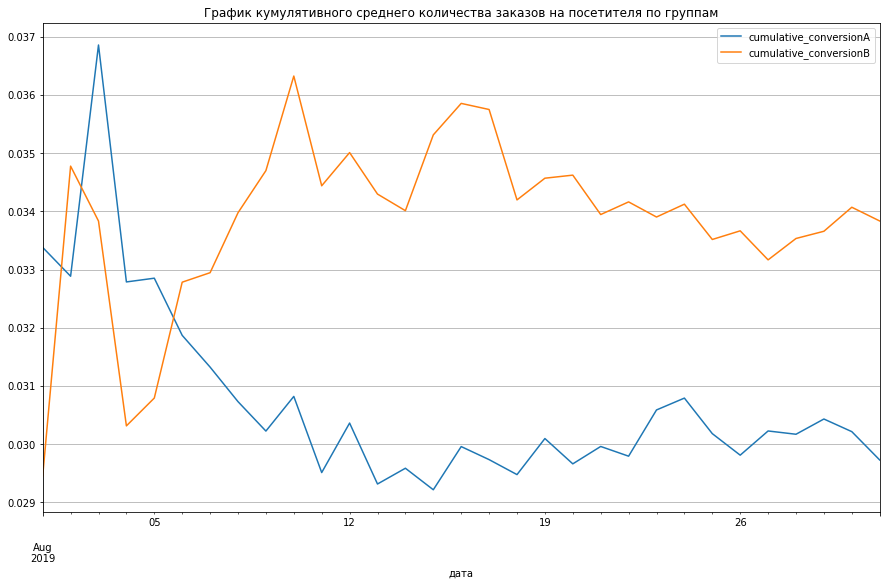

In [18]:
data['cumulative_conversionA'] = data['ordersCummulativeA'] / data['visitorsCummulativeA']
data['cumulative_conversionB'] = data['ordersCummulativeB'] / data['visitorsCummulativeB']

data[['date','cumulative_conversionA', 'cumulative_conversionB']] .plot(x = 'date',
                  grid=True,  
                  title = "График кумулятивного среднего количества заказов на посетителя по группам",
                                                                        figsize=(15,9)).set(
                  xlabel = 'дата');

Построим график кумулятивного среднего количества заказов на посетителя по группам. На нем наблюдается картина, при которой кумулятивная конверсия группы В стабильно выше, чем у группы. 

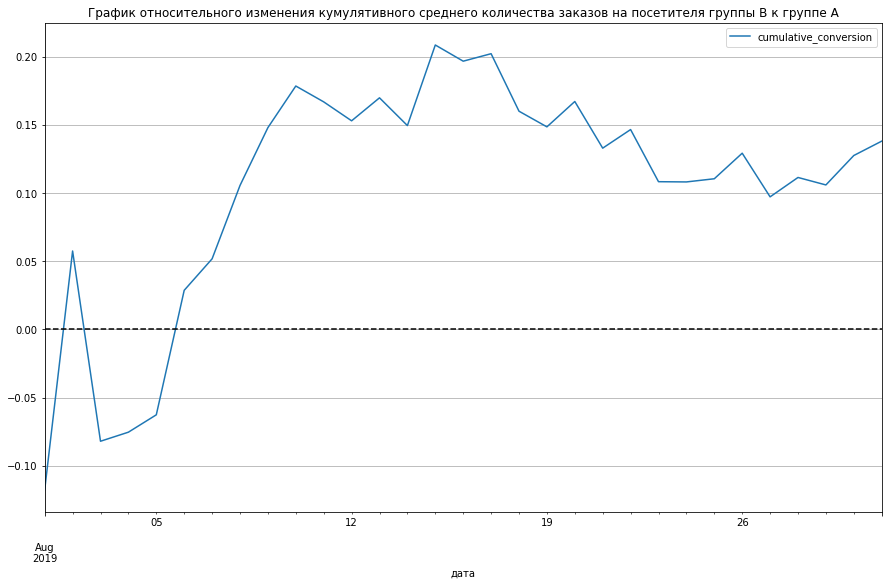

In [19]:
data['cumulative_conversion'] = data['cumulative_conversionB'] / data['cumulative_conversionA']-1


data[['date','cumulative_conversion']] .plot(x = 'date',
                  grid=True,  
                  title = "График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A", 
                                             figsize=(15,9)).set(
                  xlabel = 'дата');
plt.axhline(y=0, color='black', linestyle='--');

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. На нем видно, что результаты группы B стабильно выше чем у группы A, однако, есть общая тенденция к ухудшению среднего количества заказов.

<div class="alert alert-success">
<h2> Комментарий ревьюера<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Графики выглядят корректно, согласна с интерпретацией визуализации, отдельный плюс за оформление графиков:)

''

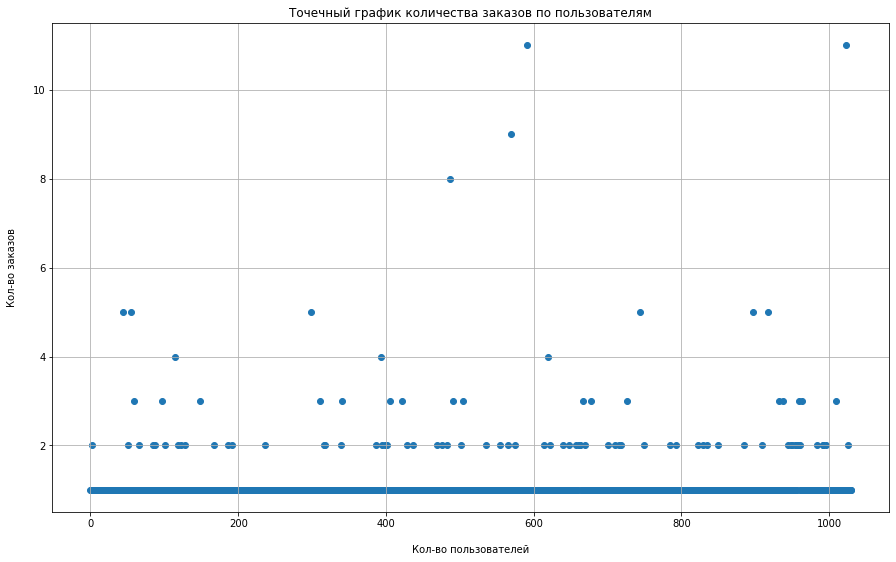

In [20]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False). \
                                                                        agg({'transactionid' : pd.Series.nunique})
ordersByUsers.columns = ['user_id','orders']
ordersByUsers.sort_values(by='orders',ascending=False).head(10)
plt.figure(figsize=(15,9))
plt.grid()
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Кол-во заказов\n')
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
;

Построим точечный график количества заказов по пользователям. На нем видно, что подавляющее большинство у пользователей совершивших 1 заказ. Совершивших 2 заказа значительно меньше, совершивших пользвателей 3 заказа единицы. Возможно, опять же аномальные значения. 

In [21]:
ordersByUsersA = orders.query('group == "A"').groupby('visitorid',as_index=False)['transactionid'].count()
ordersByUsersA.columns = ['visitorid', 'order_count']
ordersByUsersB = orders.query('group == "B"').groupby('visitorid',as_index=False)['transactionid'].count()
ordersByUsersB.columns = ['visitorid', 'order_count']
print(np.percentile(ordersByUsersA['order_count'], [95, 99])) 
print(np.percentile(ordersByUsersB['order_count'], [95, 99])) 

[2.   3.98]
[2.   3.15]


Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. В группе А не более 5% клиентов, которые оформили более 2 заказов, и не более 1% оформивших более 3 заказов. В группе В не более 5% клиентов, которые оформили более 2 заказов, и не более 1% оформивших более 3 заказов. Таким образом, мы получаем, что для группы А: 2 и 3.98 заказа на пользователя, для группы В: 2 и 3.15 заказа на пользователя. Границей для определения аномальных пользователей в обоих группах являются пользователи совершившие от 3 заказов и более, так мы уберём 1-3% пользователей с наибольшим числом заказов.

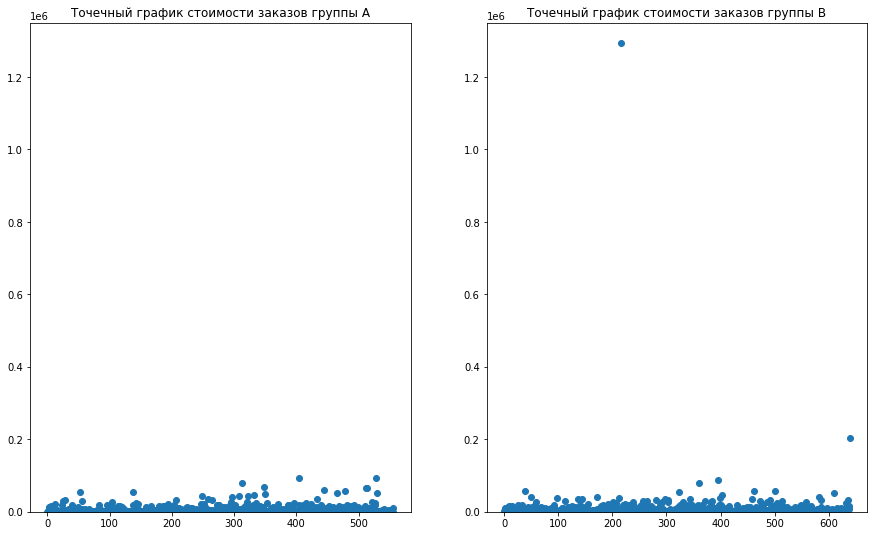

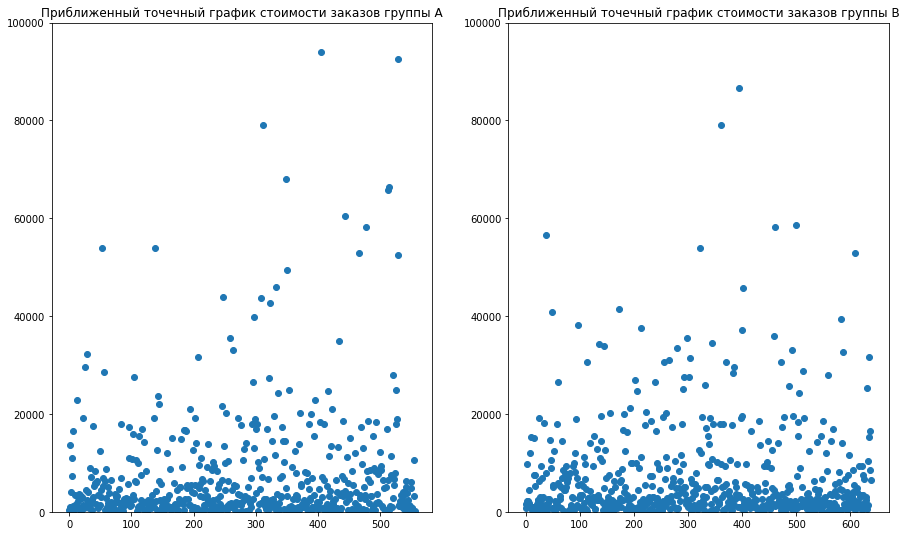

In [22]:
revenue_per_ordersA = orders.query('group == "A"')['revenue']
revenue_per_ordersB = orders.query('group == "B"')['revenue']
plt.figure(figsize=(15,9))
plt.subplot(1, 2, 1)
x_values = pd.Series(range(0,len(revenue_per_ordersA)))
plt.scatter(x_values, revenue_per_ordersA ) 
plt.title("Точечный график стоимости заказов группы А")
plt.ylim(0,1350000)
plt.subplot(1, 2, 2)
x_values = pd.Series(range(0,len(revenue_per_ordersB)))
plt.scatter(x_values, revenue_per_ordersB ) 
plt.title("Точечный график стоимости заказов группы В")
plt.ylim(0,1350000)
plt.show()
plt.figure(figsize=(15,9))
plt.subplot(1, 2, 1)
x_values = pd.Series(range(0,len(revenue_per_ordersA)))
plt.scatter(x_values, revenue_per_ordersA ) 
plt.title("Приближенный точечный график стоимости заказов группы А")
plt.ylim(0,100000)
plt.subplot(1, 2, 2)
x_values = pd.Series(range(0,len(revenue_per_ordersB)))
plt.scatter(x_values, revenue_per_ordersB ) 
plt.title("Приближенный точечный график стоимости заказов группы В")
plt.ylim(0,100000)
plt.show()

Построим точечные графики стоимости заказов для группа A и B. На них видно, что у большинства пользователей в двух группах сумма заказа не превышает 10 тысяч рублей, максимальная сумма заказа не превышает 100 тыс руб. Однако, на у группы В можно заметить аномально большой заказ, превышающий 1,2 млн.руб. Скорее всего это и есть причина резкого скачка кумулятивного среднего чека 19 августа. 

In [23]:
print(np.percentile(revenue_per_ordersA, [95, 99])) 
print(np.percentile(revenue_per_ordersB, [95, 99])) 

[26718.  62764.4]
[28787.45 55579.06]


Посчитаем 95-й и 99-й перцентили стоимости заказов. В группе А не более 5% заказов на сумму свыше 26718 руб и не более 1% на сумму свыше 62764 руб. В группе В не более 5% заказов на сумму свыше 28787 руб и не более 1% на сумму свыше 55579 руб.

<div class="alert alert-success">
<h2> Комментарий ревьюера<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Границы выбросов определены верно.

In [24]:
sampleA = pd.concat([
                     ordersByUsersA['order_count'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['order_count'])),
                     name='order_count')
                     ],axis=0)
sampleB = pd.concat([
                     ordersByUsersB['order_count'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['order_count'])),
                     name='order_count')
                    ],axis=0)
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB, True, 'two-sided')[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


Посчитаем статистическую значимость различий в среднем количестве заказов между группами по "сырым" данным и сформулируем гипотезы:
Н0: статистически значимых различий в конверсии между группами нет.
Н1: статистически значимые различия есть.
Для тестирования воспользуемся критерием Манна-Уитни, уровнем статистической значимости примем значение 0,05. Таким образом, по "сырым" данным значение p-value = 0.017, что меньше уровня статистической значимости, следовательно отвергаем гипотезу H0. Относительная разница в конверсии между группами составила 13,8%.

In [25]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.729
0.259


Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "сырым" данным и сформулируем гипотезы: 
Н0: статистически значимых различий в среднем чеке заказа между группами нет. Н1: статистически значимые различия есть.  Для тестирования воспользуемся критерием Манна-Уитни, уровнем статистической значимости примем значение 0,05. Таким образом, по "сырым" данным значение p-value = 0.729, что значительно больше уровня статистической значимости, следовательно отвергнуть гипотезу H0 мы не можем. Относительная разница суммы среднего чека между группами составила 25.8%.

In [26]:
usersWithManyOrdersA = ordersByUsersA[ordersByUsersA['order_count'] > 2]['visitorid']
  
usersWithExpensiveOrdersA = orders[orders['revenue'] > 27000]['visitorid']
abnormalUsersA = (
    pd.concat([usersWithManyOrdersA, usersWithExpensiveOrdersA], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsersA.head(5))
print('количество аномальных пользователей группы A:',abnormalUsersA.shape) 

usersWithManyOrdersB = ordersByUsersB[ordersByUsersB['order_count'] > 2]['visitorid']
usersWithExpensiveOrdersB = orders[orders['revenue'] > 29000]['visitorid']
abnormalUsersB = (
    pd.concat([usersWithManyOrdersB, usersWithExpensiveOrdersB], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsersB.head(5))
print('количество аномальных пользователей группы В:',abnormalUsersB.shape) 

568     113298937
1099    148427295
18      199603092
928     204675465
23      237748145
Name: visitorid, dtype: int64
количество аномальных пользователей группы A: (73,)
1099    148427295
928     204675465
37      249864742
684     358944393
648     382846391
Name: visitorid, dtype: int64
количество аномальных пользователей группы В: (61,)


Посчитаем количество аномальных пользователей по группам. Таким образом, в группе A - 73 пользователя, в группе B - 61.

In [27]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsersA))
        ]['order_count'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['order_count'])
            ),
            name='order_count',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsersB))
        ]['order_count'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['order_count'])
            ),
            name='order_count',
        ),
    ],
    axis=0,
) 
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered, True, 'two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.009
0.185


Посчитаем статистическу. значимость различий в среднем количестве заказов на посетителя между группами о "очищенным данным" и сформулируем следующие гипотезы:
Н0:статистически значимых различий в среднем чеке заказа между группами нет.
Н1:статистически значимые различия есть.
уровнем статистической значимости примем значение 0,05.
По "очищенным" данным значение p-value = 0.009, напомним, что по "сырым" данным было 0,017. Данное значение меньше уровня статистической значимости, следовательно гипотезу H0 отвергаем. Относительная разница в конверсии между группами составила 18.5%, напомним, что по "сырым" данным было 13.8%.

In [28]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsersA)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsersB))
                )
            ]['revenue'], True, 'two-sided',
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsersB)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsersA)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.996
0.021


Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "очищенным данным" и сформулируем гипотезы: Н0: статистически значимых различий в среднем чеке заказа между группами нет. Н1: статистически значимые различия есть. Уровнем статистической значимости примем значение 0,05.
Таким образом, по "oчищенным" данным значение p-value = 0.996, напомним, что по "сырым" данным было 0.729, что значительно больше уровня статистической значимости, следовательно гипотезу H0 не отвергаем. Относительная разница суммы среднего чека между группами составила 2.1%, напомним, что по "сырым" данным было 25.8. Получается, что значительных отличий среднего чека теперь нет.

<div class="alert alert-success">
<h2> Комментарий ревьюера<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Отличная работа! Тест для проверки гипотез выбран верно, результаты тестов проинтерпретированы корректно, плюс за формулировку гипотез в случае каждого теста.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
Несколько рекомендацией по этому шагу анализа (носят рекомендательный характер и являются развивающей обратной связью, при желании и возможности можно имплементировать часть (или все) рекомендации, а можно просто взять на вооружение🙌):

* есть особенность в реализации теста Манна-Уитни <code>stats.mannwhitneyu</code>, тест имеет параметр <code>alternative</code>, по-умолчанию, он принимает значение <code>None</code> для совместимости, но в таком случае тест выполняет проверку похожую на одностороннюю, что не совсем корректно для нашего теста. Более корректные результаты можно получить, используя <code>alternative="two-sided"</code>
    
Подробнее о проверках можно почитать вот в этой [статье](http://www.stat.yale.edu/Courses/1997-98/101/sigtest.htm#:~:text=An%20alternative%20hypothesis%20may%20be,the%20direction%20does%20not%20matter.) 
        
В новой версии библиотеки scipy этот аргумент специфицируется по дефолту. В более старых версиях - его важно специфицировать. 
   
* и еще про проблему выбора теста (одностороннего или двустороннего ты можешь почитать по ссылкам ниже):
        
`A two-tailed test is appropriate if you want to determine if there is any difference between the groups you are comparing. For instance, if you want to see if Group A scored higher or lower than Group B, then you would want to use a two-tailed test. This is because a two-tailed test uses both the positive and negative tails of the distribution. In other words, it tests for the possibility of positive or negative differences.`

`A one-tailed test is appropriate if you only want to determine if there is a difference between groups in a specific direction. So, if you are only interested in determining if Group A scored higher than Group B, and you are completely uninterested in possibility of Group A scoring lower than Group B, then you may want to use a one-tailed test.`
    
Источник: https://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/#:~:text=This%20is%20because%20a%20two,groups%20in%20a%20specific%20direction.
    
И еще несколько ссылок по этому вопросу:
    
https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/bs704_nonparametric4.html
    
https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/
    
https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/one-tailed-test-or-two/
        
* чтобы аргументировать применение теста Манна-Уитни (один из аргументов - ненормальность распределения), можно проверить выборки на нормальность распределения, с этой задачей справится тест Шапиро:
        
реализация на Python
        
https://www.statology.org/shapiro-wilk-test-python/
        
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
        
https://towardsdatascience.com/methods-for-normality-test-with-application-in-python-bb91b49ed0f5

### Результаты теста и общие выводы

  В ходе работы было проведено исследование списка гипотез для увеличения выручки крупного интернет-магазина. Перед началом исследование необходимо было обработать входные данные. В ходе работы проверены данные на пропущенные значения, заменены типы данных для простоты исследования. После всех исправлений была проведена приоритизация гипотез и анализ A/B-теста. 
  За основу была взята гипотеза №7 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".  Анализ A/B-теста показал: 
  - Есть статистические различия по среднему количеству заказов между группами по "сырым" и "очищенным данным;
  - Нет статистически значимых различий между группами по "сырым" и "очищенным" данным;
  - График различия среднего количества заказов между группами показал, что конверия группы B выше чем у группы A;
  - График различия среднего чека схож у двух групп, на нем не видны сильные различия. 
  
  
  Таким образом, останавливаем тест и фиксируем победу у группы B.
  

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Эдгар, спасибо за твой проект! Ты приложил много усилий, чтобы довести его до конца, все задачи в рамках проекта тебе удалось успешно решить, это видно невооруженным глазом, отличная работа! У меня нет критичных замечаний к твоей работе, только несколько рекомендаций, которые ты сможешь освоить самостоятельно в удобное для тебя время👌
    

**Отмечу отдельные положительные моменты проекта🙂**:
* На разных шагах проекта ты предлагал очень интересные решения и методы для их реализации. Хорошая работа!
* Ты активно работал с визуализацией, хорошо, что ты используешь графики в работе над проектами!
* Тест для проверки гипотез выбран верно, интерпретация результатов теста также корректна:)
* Проект в целом хорошо структурирован и оформлен, это плюс:)

    
Спешу тебе сообщить, что твой проект принят и ты можешь перейти на следующий спринт🐱‍🏍
    
Желаю тебе крутых и интересных проектов на следующих спринтах🙌😉
    
![gif](https://media.giphy.com/media/l41Yh1olOKd1Tgbw4/giphy.gif)